# Extracting features and training classifiers

In [ ]:
# Imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from joblib import dump, load

## Load and split data

In [4]:
df = pd.read_excel('complete_dataset.xlsx')
display(df.head())

X = df['Text']
y = df['Verdict']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

tfidf_vectorizer = TfidfVectorizer()

,Verdict,Text
0,False,nieoczywisty rzeczywistość fsychologia pozytyw...
1,False,bęcwalstwo polski nauka odkryty rpa nowy wirus...
2,False,magmag zaczęlo wyłączać serce sportowiec cały ...
3,False,omikron atakować kłamstwo kowidowych jednyn sp...
4,False,głowny portal zdrowie jeszu wiara yeshu ang fi...


## NB classifier

### NB - Unigramy

Liczba cech ograniczona do N = 1000

	 NB Best score: 0.8635131560204311 for params: {'alpha': 0.1}

		 Prec: 0.8534136546184738             
		 Rec: 0.9615384615384616             
		 F1: 0.9042553191489361             
		 Acc: 0.8660714285714286             
		 ROC_AUC: 0.8220735785953178


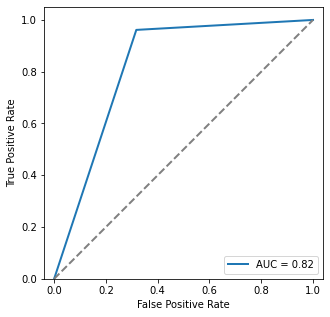

Liczba cech ograniczona do N = 3000

	 NB Best score: 0.8871064894894284 for params: {'alpha': 0.1}

		 Prec: 0.8926315789473684             
		 Rec: 0.9592760180995475             
		 F1: 0.9247546346782988             
		 Acc: 0.8973214285714286             
		 ROC_AUC: 0.8687684438323825


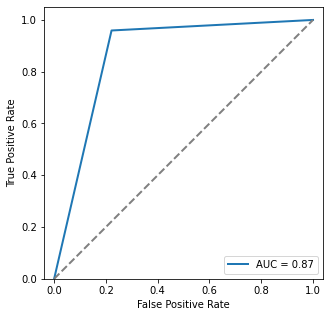

Liczba cech ograniczona do N = 10000

	 NB Best score: 0.903056510856515 for params: {'alpha': 0.03}

		 Prec: 0.9293598233995585             
		 Rec: 0.9524886877828054             
		 F1: 0.9407821229050279             
		 Acc: 0.9211309523809523             
		 ROC_AUC: 0.9066791265000984


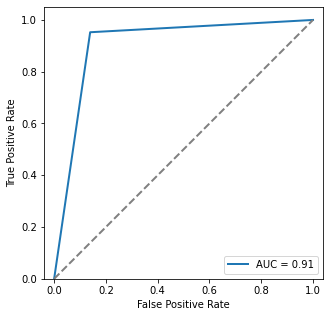

Liczba cech ograniczona do N = None

	 NB Best score: 0.9024216031419792 for params: {'alpha': 0.01}

		 Prec: 0.8817427385892116             
		 Rec: 0.9615384615384616             
		 F1: 0.9199134199134198             
		 Acc: 0.8898809523809523             
		 ROC_AUC: 0.8568561872909699


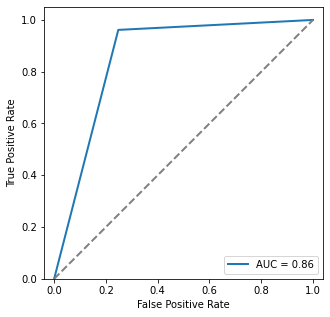

In [20]:
for n in [1000, 3000, 10000, None]:
    print('Liczba cech ograniczona do N =', n)
    tfidf_vectorizer = TfidfVectorizer(max_features=n)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    # dump(tfidf_vectorizer, 'tfidf.joblib') 
    tfidf_test = tfidf_vectorizer.transform(X_test)
    # print(tfidf_train.shape)

    params = {'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}
    nb_classifier = GridSearchCV(MultinomialNB(), params)

    nb_classifier.fit(tfidf_train, y_train)
    nb_y_pred = nb_classifier.predict(tfidf_test)
    print(f'\n\t NB Best score: {nb_classifier.best_score_} for params: {nb_classifier.best_params_}')
    # dump(nb_classifier, 'nb_classifier.joblib') 
    print(f'\n\t\t Prec: {metrics.precision_score(y_test, nb_y_pred)} \
            \n\t\t Rec: {metrics.recall_score(y_test, nb_y_pred)} \
            \n\t\t F1: {metrics.f1_score(y_test, nb_y_pred)} \
            \n\t\t Acc: {metrics.accuracy_score(y_test, nb_y_pred)} \
            \n\t\t ROC_AUC: {metrics.roc_auc_score(y_test, nb_y_pred)}')
    
    # ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, nb_y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(5, 5))
    plt.axis('equal')
    plt.plot(fpr, tpr, lw=2, label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="gray", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()



### NB - Bigramy

Liczba cech ograniczona do N = 1000

	 NB Best score: 0.7818807106082498 for params: {'alpha': 0.3}

		 Prec: 0.7825278810408922             
		 Rec: 0.9524886877828054             
		 F1: 0.8591836734693877             
		 Acc: 0.7946428571428571             
		 ROC_AUC: 0.7218965178044462


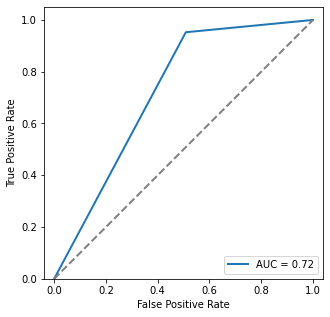

Liczba cech ograniczona do N = 3000

	 NB Best score: 0.8188661199405791 for params: {'alpha': 0.1}

		 Prec: 0.806390977443609             
		 Rec: 0.9705882352941176             
		 F1: 0.8809034907597536             
		 Acc: 0.8273809523809523             
		 ROC_AUC: 0.7613810741687979


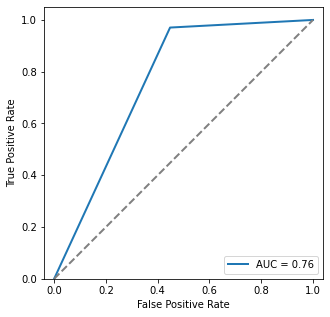

Liczba cech ograniczona do N = 10000

	 NB Best score: 0.8462851793817789 for params: {'alpha': 0.03}

		 Prec: 0.8132075471698114             
		 Rec: 0.9751131221719457             
		 F1: 0.8868312757201646             
		 Acc: 0.8363095238095238             
		 ROC_AUC: 0.7723391697816251


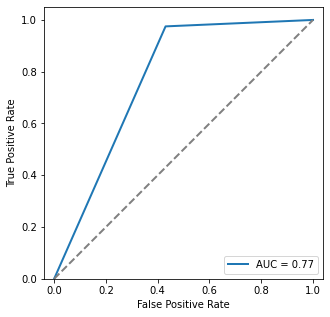

Liczba cech ograniczona do N = 30000

	 NB Best score: 0.8762662542479802 for params: {'alpha': 0.01}

		 Prec: 0.8140417457305503             
		 Rec: 0.9705882352941176             
		 F1: 0.8854489164086687             
		 Acc: 0.8348214285714286             
		 ROC_AUC: 0.7722506393861892


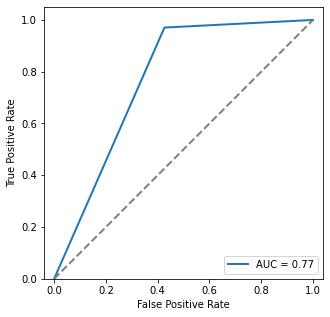

Liczba cech ograniczona do N = 100000

	 NB Best score: 0.904953094157628 for params: {'alpha': 0.001}

		 Prec: 0.8014981273408239             
		 Rec: 0.9683257918552036             
		 F1: 0.8770491803278688             
		 Acc: 0.8214285714285714             
		 ROC_AUC: 0.7537281133189062


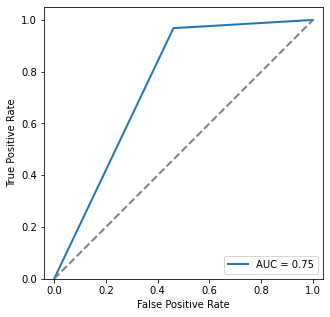

Liczba cech ograniczona do N = None

	 NB Best score: 0.8392788099550275 for params: {'alpha': 0.3}

		 Prec: 0.7587412587412588             
		 Rec: 0.9819004524886877             
		 F1: 0.8560157790927021             
		 Acc: 0.7827380952380952             
		 ROC_AUC: 0.6909502262443439


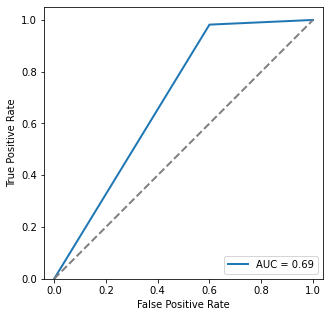

In [21]:
for n in [1000, 3000, 10000, 30000, 100000, None]:
    print('Liczba cech ograniczona do N =', n)
    tfidf_vectorizer_bigrams = TfidfVectorizer(ngram_range=(2, 2), max_features=n)
    tfidf_train_bigrams = tfidf_vectorizer_bigrams.fit_transform(X_train)
    tfidf_test_bigrams = tfidf_vectorizer_bigrams.transform(X_test)
    # print(tfidf_train_bigrams.shape)

    params = {'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}
    nb_classifier = GridSearchCV(MultinomialNB(), params)

    nb_classifier.fit(tfidf_train_bigrams, y_train)
    nb_y_pred_bigrams = nb_classifier.predict(tfidf_test_bigrams)
    print(f'\n\t NB Best score: {nb_classifier.best_score_} for params: {nb_classifier.best_params_}')
    print(f'\n\t\t Prec: {metrics.precision_score(y_test, nb_y_pred_bigrams)} \
            \n\t\t Rec: {metrics.recall_score(y_test, nb_y_pred_bigrams)} \
            \n\t\t F1: {metrics.f1_score(y_test, nb_y_pred_bigrams)} \
            \n\t\t Acc: {metrics.accuracy_score(y_test, nb_y_pred_bigrams)} \
            \n\t\t ROC_AUC: {metrics.roc_auc_score(y_test, nb_y_pred_bigrams)}')
    
    # ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, nb_y_pred_bigrams)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(5, 5))
    plt.axis('equal')
    plt.plot(fpr, tpr, lw=2, label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="gray", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()


## LSVM classifier

### LSVM - Unigramy

Liczba cech ograniczona do N = 1000

	 LSVC Best score: 0.900500600313384 for params: {'C': 0.3}

		Prec: 0.9201773835920177             
		 Rec: 0.9389140271493213             
		 F1: 0.9294512877939529             
		 Acc: 0.90625             
		 ROC_AUC: 0.8911961440094432


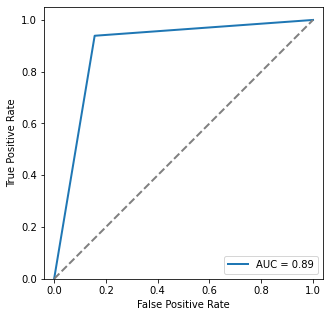

Liczba cech ograniczona do N = 3000

	 LSVC Best score: 0.9107018579190493 for params: {'C': 0.3}

		Prec: 0.9433106575963719             
		 Rec: 0.9411764705882353             
		 F1: 0.9422423556058891             
		 Acc: 0.9241071428571429             
		 ROC_AUC: 0.9162404092071611


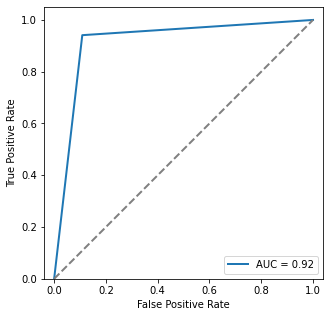

Liczba cech ograniczona do N = 10000

	 LSVC Best score: 0.9209071854459616 for params: {'C': 1}

		Prec: 0.9565217391304348             
		 Rec: 0.9457013574660633             
		 F1: 0.9510807736063709             
		 Acc: 0.9360119047619048             
		 ROC_AUC: 0.9315463309069447


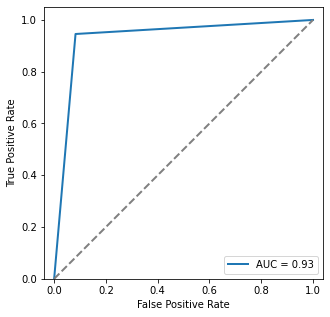

Liczba cech ograniczona do N = None

	 LSVC Best score: 0.9253657841720763 for params: {'C': 1}

		Prec: 0.9607390300230947             
		 Rec: 0.9411764705882353             
		 F1: 0.9508571428571428             
		 Acc: 0.9360119047619048             
		 ROC_AUC: 0.9336317135549872


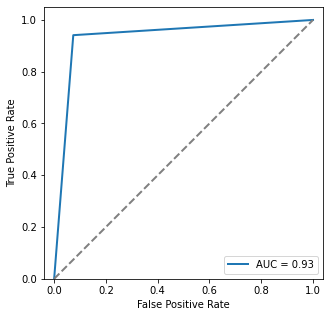

In [22]:
for n in [1000, 3000, 10000, None]:
    print('Liczba cech ograniczona do N =', n)
    tfidf_vectorizer = TfidfVectorizer(max_features=n)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    # dump(tfidf_vectorizer, 'tfidf.joblib') 
    tfidf_test = tfidf_vectorizer.transform(X_test)
    # print(tfidf_train.shape)

    params = {'C': [0.01, 0.03, 0.1, 0.3, 1]}
    svc_classifier = GridSearchCV(LinearSVC(), params)

    svc_classifier.fit(tfidf_train, y_train)
    svc_y_pred = svc_classifier.predict(tfidf_test)
    print(f'\n\t LSVC Best score: {svc_classifier.best_score_} for params: {svc_classifier.best_params_}')
    # dump(svc_classifier, 'svc_classifier.joblib') 
    print(f'\n\t\tPrec: {metrics.precision_score(y_test, svc_y_pred)} \
            \n\t\t Rec: {metrics.recall_score(y_test, svc_y_pred)} \
            \n\t\t F1: {metrics.f1_score(y_test, svc_y_pred)} \
            \n\t\t Acc: {metrics.accuracy_score(y_test, svc_y_pred)} \
            \n\t\t ROC_AUC: {metrics.roc_auc_score(y_test, svc_y_pred)}')
    
    # ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svc_y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(5, 5))
    plt.axis('equal')
    plt.plot(fpr, tpr, lw=2, label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="gray", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()



### LSVM - Bigramy

Liczba cech ograniczona do N = 1000

	 LSVC Best score: 0.8871085244500521 for params: {'C': 0.3}

		 Prec: 0.8993288590604027             
		 Rec: 0.9095022624434389             
		 F1: 0.9043869516310461             
		 Acc: 0.8735119047619048             
		 ROC_AUC: 0.8569250442651977


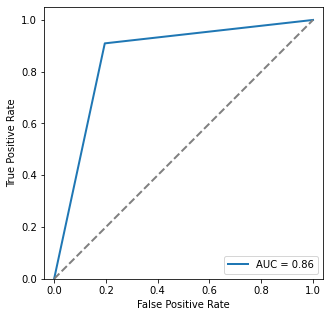

Liczba cech ograniczona do N = 3000

	 LSVC Best score: 0.8870983496469342 for params: {'C': 0.3}

		 Prec: 0.9076923076923077             
		 Rec: 0.9343891402714932             
		 F1: 0.9208472686733556             
		 Acc: 0.8943452380952381             
		 ROC_AUC: 0.8758902223096596


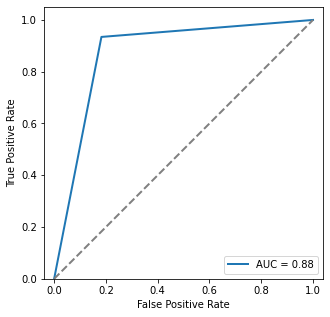

Liczba cech ograniczona do N = 10000

	 LSVC Best score: 0.8953867442664984 for params: {'C': 1}

		 Prec: 0.9100877192982456             
		 Rec: 0.9389140271493213             
		 F1: 0.9242761692650335             
		 Acc: 0.8988095238095238             
		 ROC_AUC: 0.880326578792052


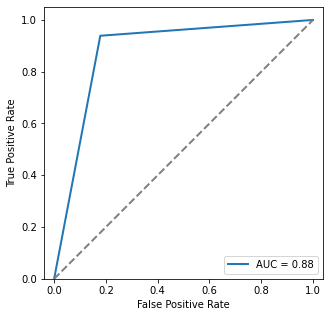

Liczba cech ograniczona do N = 30000

	 LSVC Best score: 0.8973138519769643 for params: {'C': 1}

		 Prec: 0.9006479481641468             
		 Rec: 0.9434389140271493             
		 F1: 0.9215469613259669             
		 Acc: 0.8943452380952381             
		 ROC_AUC: 0.8717194570135747


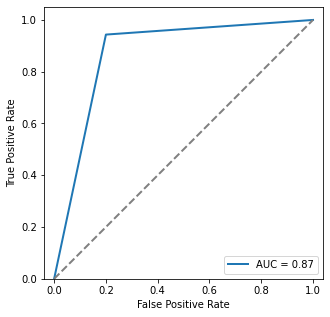

Liczba cech ograniczona do N = 100000

	 LSVC Best score: 0.8717954457581246 for params: {'C': 1}

		 Prec: 0.8683127572016461             
		 Rec: 0.9547511312217195             
		 F1: 0.9094827586206896             
		 Acc: 0.875             
		 ROC_AUC: 0.8382451308282511


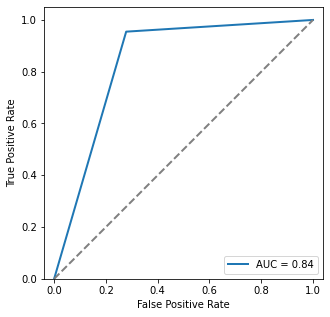

Liczba cech ograniczona do N = None

	 LSVC Best score: 0.7965568466250178 for params: {'C': 1}

		 Prec: 0.8428290766208252             
		 Rec: 0.9705882352941176             
		 F1: 0.9022082018927445             
		 Acc: 0.8616071428571429             
		 ROC_AUC: 0.811381074168798


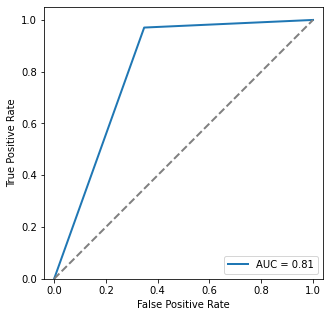

In [23]:
for n in [1000, 3000, 10000, 30000, 100000, None]:
    print('Liczba cech ograniczona do N =', n)
    tfidf_vectorizer_bigrams = TfidfVectorizer(ngram_range=(2, 2), max_features=n)
    tfidf_train_bigrams = tfidf_vectorizer_bigrams.fit_transform(X_train)
    tfidf_test_bigrams = tfidf_vectorizer_bigrams.transform(X_test)
    # print(tfidf_train_bigrams.shape)

    params = {'C': [0.01, 0.03, 0.1, 0.3, 1]}
    svc_classifier = GridSearchCV(LinearSVC(), params)

    svc_classifier.fit(tfidf_train_bigrams, y_train)
    svc_y_pred_bigrams = svc_classifier.predict(tfidf_test_bigrams)
    print(f'\n\t LSVC Best score: {svc_classifier.best_score_} for params: {svc_classifier.best_params_}')
    print(f'\n\t\t Prec: {metrics.precision_score(y_test, svc_y_pred_bigrams)} \
            \n\t\t Rec: {metrics.recall_score(y_test, svc_y_pred_bigrams)} \
            \n\t\t F1: {metrics.f1_score(y_test, svc_y_pred_bigrams)} \
            \n\t\t Acc: {metrics.accuracy_score(y_test, svc_y_pred_bigrams)} \
            \n\t\t ROC_AUC: {metrics.roc_auc_score(y_test, svc_y_pred_bigrams)}')
    
    # ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svc_y_pred_bigrams)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(5, 5))
    plt.axis('equal')
    plt.plot(fpr, tpr, lw=2, label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="gray", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()


## RF classifier

### RF - Unigramy

Liczba cech ograniczona do N = 1000

	 RF Best score: 0.8985857023666591 for params: {'n_estimators': 300}

		 Prec: 0.9088888888888889             
		 Rec: 0.9253393665158371             
		 F1: 0.9170403587443946             
		 Acc: 0.8898809523809523             
		 ROC_AUC: 0.87353924847531


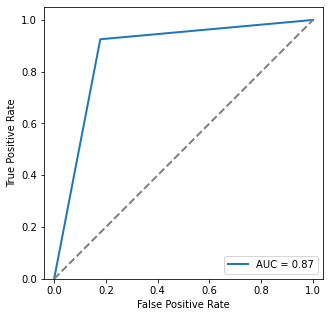

Liczba cech ograniczona do N = 3000

	 RF Best score: 0.8992165401599479 for params: {'n_estimators': 300}

		 Prec: 0.9129464285714286             
		 Rec: 0.9253393665158371             
		 F1: 0.9191011235955057             
		 Acc: 0.8928571428571429             
		 ROC_AUC: 0.8778870745622664


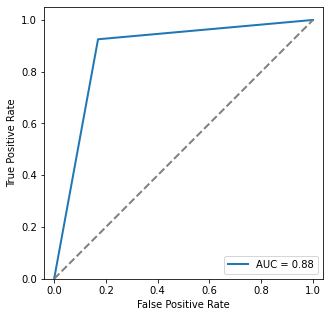

Liczba cech ograniczona do N = 10000

	 RF Best score: 0.8992206100811948 for params: {'n_estimators': 1000}

		 Prec: 0.9111111111111111             
		 Rec: 0.9276018099547512             
		 F1: 0.9192825112107622             
		 Acc: 0.8928571428571429             
		 ROC_AUC: 0.8768443832382451


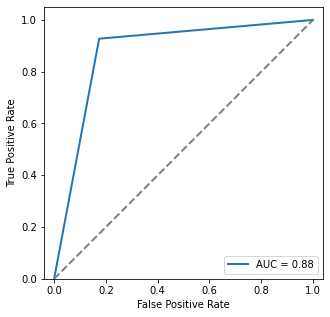

Liczba cech ograniczona do N = None

	 RF Best score: 0.8998575527563542 for params: {'n_estimators': 1000}

		 Prec: 0.8995633187772926             
		 Rec: 0.9321266968325792             
		 F1: 0.9155555555555556             
		 Acc: 0.8869047619047619             
		 ROC_AUC: 0.8660633484162896


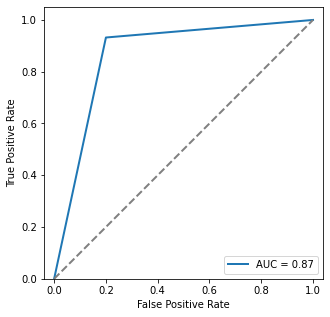

In [24]:
for n in [1000, 3000, 10000, None]:
    print('Liczba cech ograniczona do N =', n)
    tfidf_vectorizer = TfidfVectorizer(max_features=n)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    # dump(tfidf_vectorizer, 'tfidf.joblib') 
    tfidf_test = tfidf_vectorizer.transform(X_test)
    # print(tfidf_train.shape)

    params = {'n_estimators': [10, 30, 100, 300, 1000]}
    rf_classifier = GridSearchCV(RandomForestClassifier(), params)

    rf_classifier.fit(tfidf_train, y_train)
    rf_y_pred = rf_classifier.predict(tfidf_test)
    print(f'\n\t RF Best score: {rf_classifier.best_score_} for params: {rf_classifier.best_params_}')
    # dump(rf_classifier, 'rf_classifier.joblib') 
    print(f'\n\t\t Prec: {metrics.precision_score(y_test, rf_y_pred)} \
            \n\t\t Rec: {metrics.recall_score(y_test, rf_y_pred)} \
            \n\t\t F1: {metrics.f1_score(y_test, rf_y_pred)} \
            \n\t\t Acc: {metrics.accuracy_score(y_test, rf_y_pred)} \
            \n\t\t ROC_AUC: {metrics.roc_auc_score(y_test, rf_y_pred)}')
    
    # ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(5, 5))
    plt.axis('equal')
    plt.plot(fpr, tpr, lw=2, label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="gray", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    

### RF - Bigramy

Liczba cech ograniczona do N = 1000

	 RF Best score: 0.8788079200667468 for params: {'n_estimators': 300}

		 Prec: 0.9133489461358314             
		 Rec: 0.8823529411764706             
		 F1: 0.8975834292289987             
		 Acc: 0.8675595238095238             
		 ROC_AUC: 0.8607416879795396


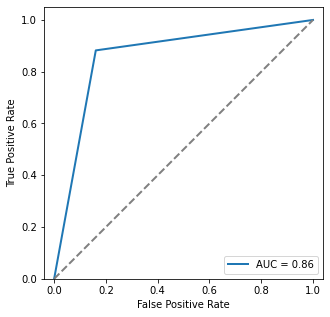

Liczba cech ograniczona do N = 3000

	 RF Best score: 0.8781770822734579 for params: {'n_estimators': 1000}

		 Prec: 0.9304556354916067             
		 Rec: 0.8778280542986425             
		 F1: 0.9033760186263097             
		 Acc: 0.8764880952380952             
		 ROC_AUC: 0.8758705488884517


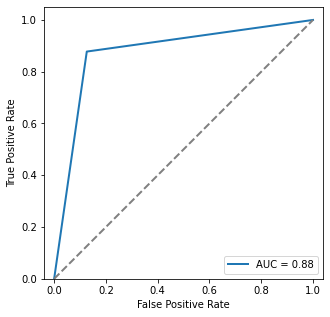

Liczba cech ograniczona do N = 10000

	 RF Best score: 0.8820007732850369 for params: {'n_estimators': 300}

		 Prec: 0.9328537170263789             
		 Rec: 0.8800904977375565             
		 F1: 0.9057043073341094             
		 Acc: 0.8794642857142857             
		 ROC_AUC: 0.8791756836513871


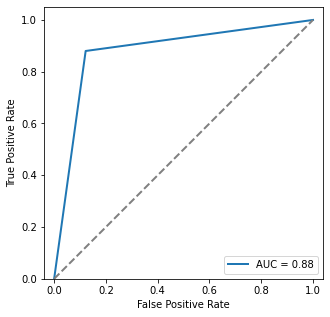

Liczba cech ograniczona do N = 30000

	 RF Best score: 0.8679778596284162 for params: {'n_estimators': 1000}

		 Prec: 0.9618320610687023             
		 Rec: 0.8552036199095022             
		 F1: 0.9053892215568862             
		 Acc: 0.8824404761904762             
		 ROC_AUC: 0.8949931143025772


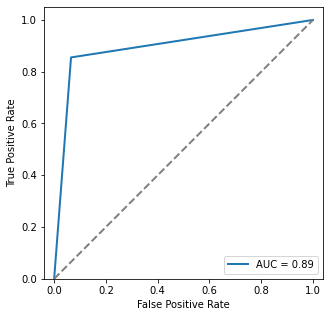

Liczba cech ograniczona do N = 100000

	 RF Best score: 0.8718157953643597 for params: {'n_estimators': 1000}

		 Prec: 0.9767441860465116             
		 Rec: 0.8552036199095022             
		 F1: 0.9119420989143545             
		 Acc: 0.8913690476190477             
		 ROC_AUC: 0.9080365925634468


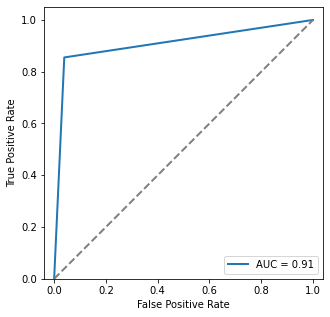

Liczba cech ograniczona do N = None

	 RF Best score: 0.873732728271708 for params: {'n_estimators': 1000}

		 Prec: 0.9740932642487047             
		 Rec: 0.8506787330316742             
		 F1: 0.9082125603864734             
		 Acc: 0.8869047619047619             
		 ROC_AUC: 0.9036002360810546


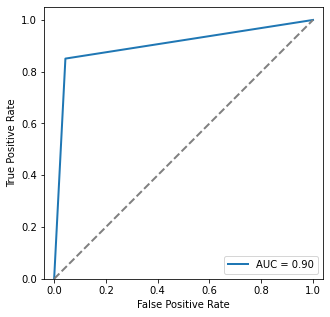

In [25]:
for n in [1000, 3000, 10000, 30000, 100000, None]:
    print('Liczba cech ograniczona do N =', n)
    tfidf_vectorizer_bigrams = TfidfVectorizer(ngram_range=(2, 2), max_features=n)
    tfidf_train_bigrams = tfidf_vectorizer_bigrams.fit_transform(X_train)
    tfidf_test_bigrams = tfidf_vectorizer_bigrams.transform(X_test)
    # print(tfidf_train_bigrams.shape)

    params = {'n_estimators': [10, 30, 100, 300, 1000]}
    rf_classifier = GridSearchCV(RandomForestClassifier(), params)

    rf_classifier.fit(tfidf_train_bigrams, y_train)
    rf_y_pred_bigrams = rf_classifier.predict(tfidf_test_bigrams)
    print(f'\n\t RF Best score: {rf_classifier.best_score_} for params: {rf_classifier.best_params_}')
    print(f'\n\t\t Prec: {metrics.precision_score(y_test, rf_y_pred_bigrams)} \
            \n\t\t Rec: {metrics.recall_score(y_test, rf_y_pred_bigrams)} \
            \n\t\t F1: {metrics.f1_score(y_test, rf_y_pred_bigrams)} \
            \n\t\t Acc: {metrics.accuracy_score(y_test, rf_y_pred_bigrams)} \
            \n\t\t ROC_AUC: {metrics.roc_auc_score(y_test, rf_y_pred_bigrams)}')
    
    # ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_y_pred_bigrams)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(5, 5))
    plt.axis('equal')
    plt.plot(fpr, tpr, lw=2, label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="gray", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
